<a href="https://colab.research.google.com/github/InvestitoreComune/analysis/blob/main/analisi_rischio_di_sequenza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISI SEQUENCE OF RETURNS RISK - INVESTITORE COMUNE


📁 CARICA IL FILE EXCEL SHILLER
Per favore, carica il file 'ie_data__5_.xls' quando richiesto.



Saving ie_data (5).xls to ie_data (5) (1).xls

✓ File caricato: ie_data (5) (1).xls

📊 Caricamento dati Shiller...
Dimensioni file: (1868, 22)

Prime righe del file:
                                                  0      1         2   \
0                                                NaN    NaN       NaN   
1  Stock Market Data Used in "Irrational Exuberan...    NaN       NaN   
2                                 Robert J. Shiller     NaN       NaN   
3                                                NaN    NaN       NaN   
4                                                NaN    NaN       NaN   
5                                                NaN    S&P       NaN   
6                                                NaN  Comp.  Dividend   
7                                               Date      P         D   
8                                            1871.01   4.44      0.26   
9                                            1871.02    4.5      0.26   

         3           4        

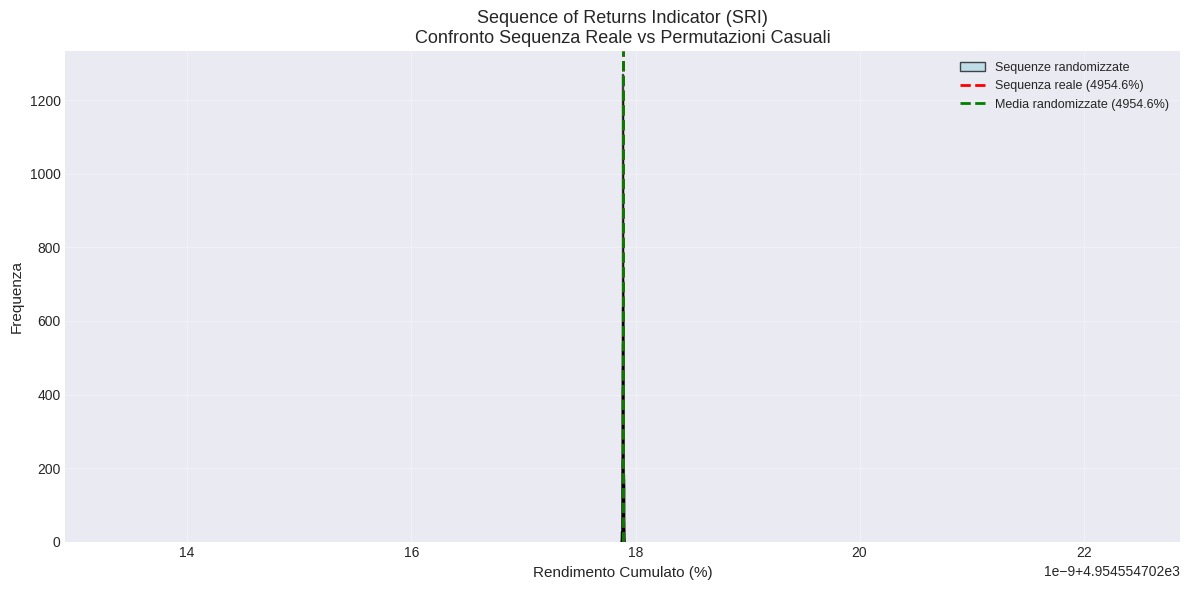

✓ Grafico SRI salvato: sri_analysis.png
FASE 2: ROLLING WINDOWS ANALYSIS


📈 Analisi rolling windows (30 anni)...

📊 Risultati Rolling Windows:
WR       Successo     Capitale Finale Mediano   Max DD Mediano 
----------------------------------------------------------------------
3.0%      76.0%      €        319,922            75.1%
4.0%      46.6%      €              0           100.0%
5.0%      21.1%      €              0           100.0%




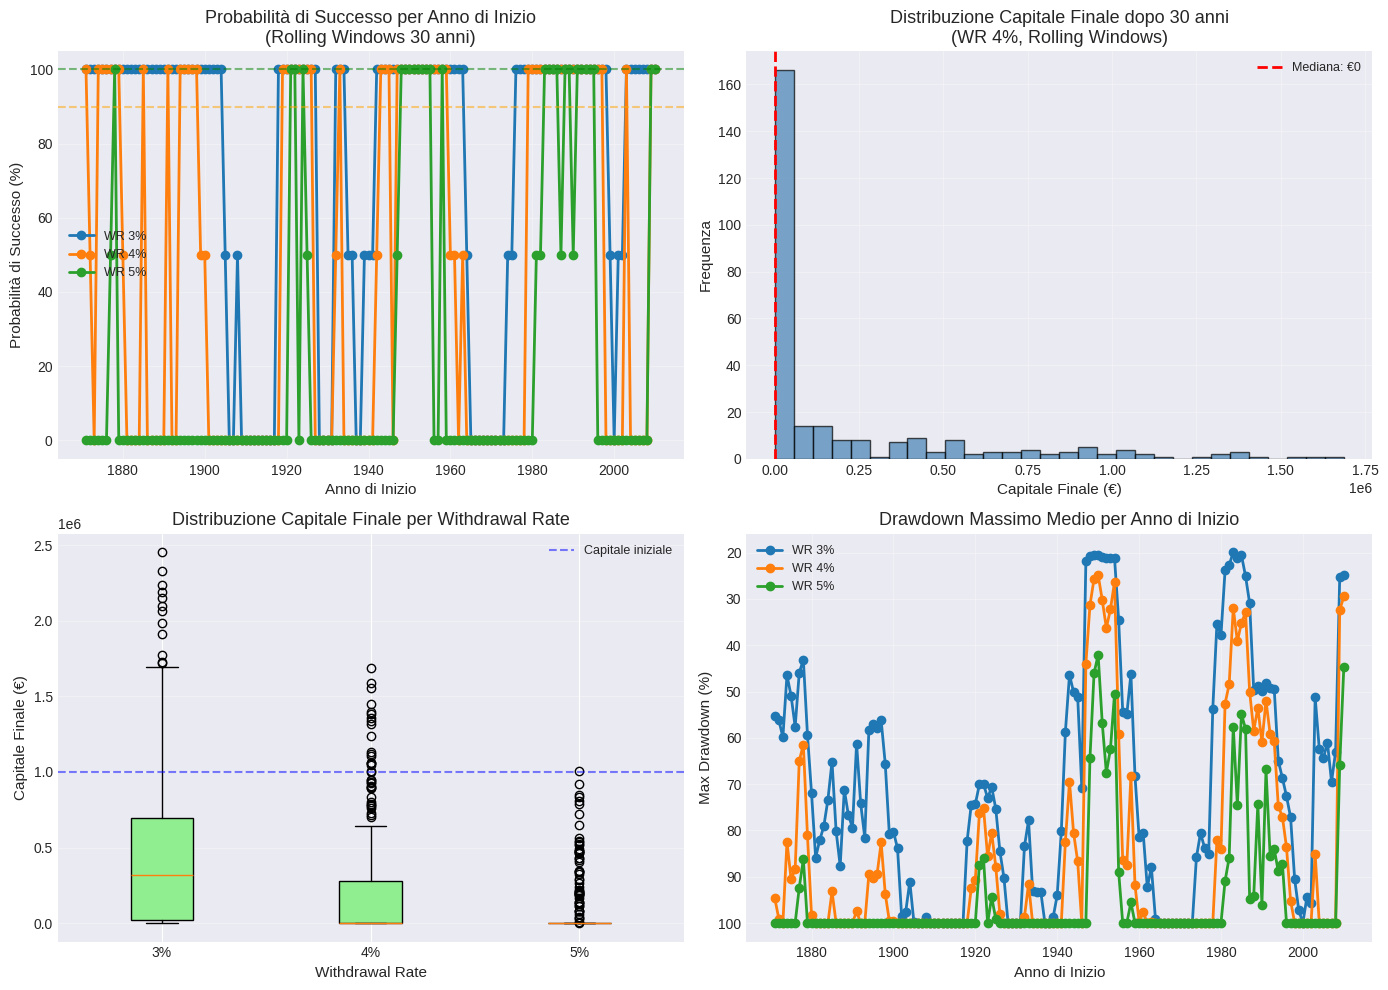

✓ Grafico rolling windows salvato: rolling_windows_analysis.png
✓ Risultati rolling windows salvati: rolling_windows_results.csv

FASE 3: BOOTSTRAP SIMULATIONS


🎲 Bootstrap simulations (5000 simulazioni)...
✓ Probabilità di successo (WR 4.0%): 48.4%
✓ Capitale finale mediano: €0
✓ Capitale finale 10° percentile: €0




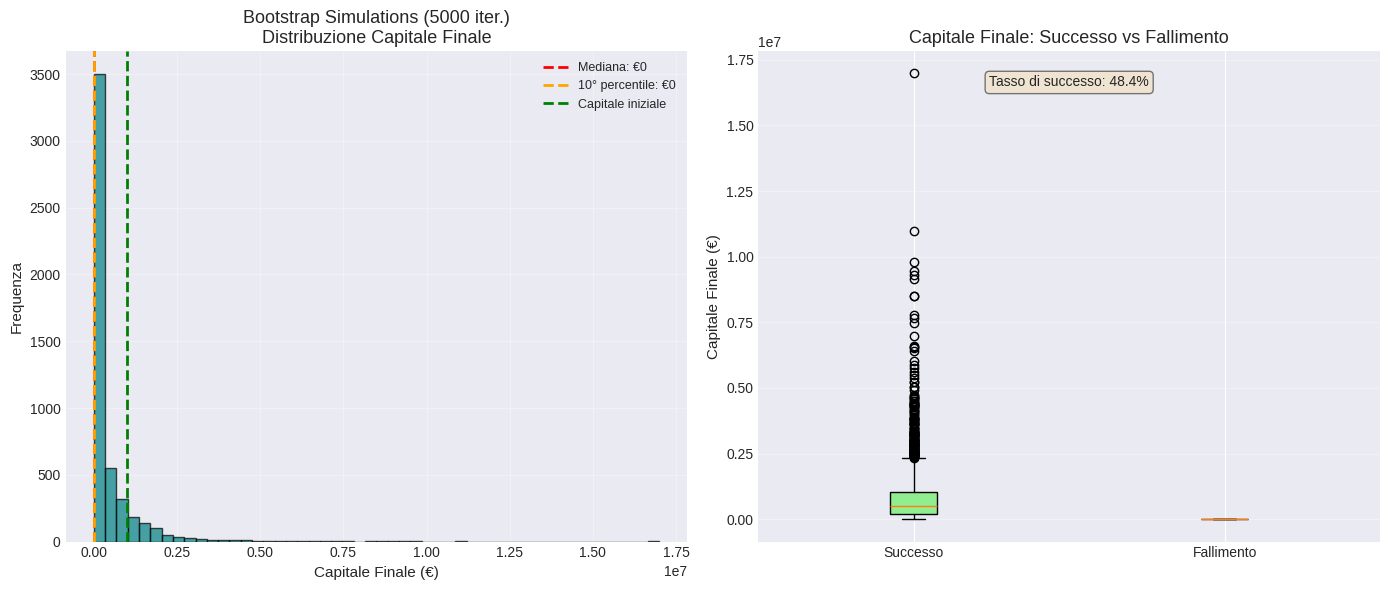

✓ Grafico bootstrap salvato: bootstrap_simulations.png
✓ Risultati bootstrap salvati: bootstrap_results.csv

FASE 4: WORST RETIREMENT START DATES


💀 Analisi worst retirement start dates...
Anni analizzati: [1929, 1937, 1966, 1973, 2000]
WR: 4.0%, Capitale: €1,000,000, Orizzonte: 30 anni


START YEAR: 1929
Capitale finale: €0
Max drawdown: 100.0%
Successo: ✗

Primi 5 anni:
 Year     Return  Withdrawal  Ending_Balance
 1929  15.303986     40000.0    1.106918e+06
 1929  11.218637     40000.0    1.186612e+06
 1930 -20.711567     40000.0    9.091307e+05
 1930 -13.647178     40000.0    7.505188e+05
 1931  -6.942963     40000.0    6.611878e+05

Ultimi 5 anni:
 Year     Return  Withdrawal  Ending_Balance
 1941  15.618772         0.0             0.0
 1942 -25.298376         0.0             0.0
 1942   3.191552         0.0             0.0
 1943   2.992981         0.0             0.0
 1943  13.526372         0.0             0.0

START YEAR: 1937
Capitale finale: €0
Max drawdown: 100.0%
Successo:

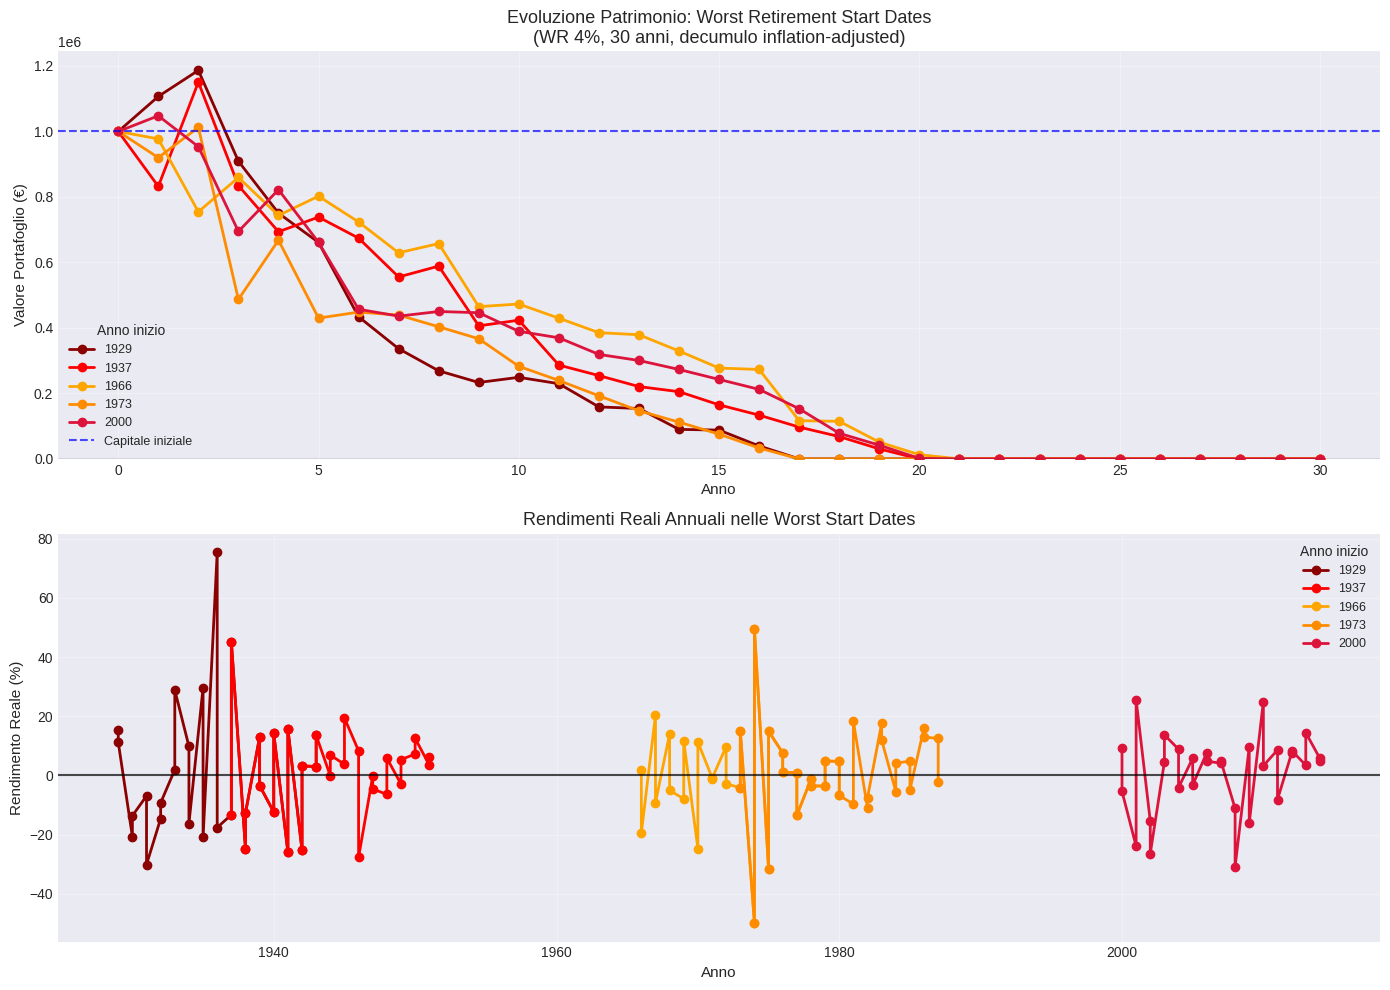

✓ Grafico worst start dates salvato: worst_start_dates.png
✓ Dettagli 1929 salvati: worst_start_1929.csv
✓ Dettagli 1937 salvati: worst_start_1937.csv
✓ Dettagli 1966 salvati: worst_start_1966.csv
✓ Dettagli 1973 salvati: worst_start_1973.csv
✓ Dettagli 2000 salvati: worst_start_2000.csv


REPORT FINALE - SEQUENCE OF RETURNS RISK


📊 METRICHE PRINCIPALI
--------------------------------------------------------------------------------

1. SEQUENCE OF RETURNS INDICATOR (SRI):
   - SRI assoluto: 0.00%
   - SRI relativo: 0.00%
   - Percentile: 81.7°

2. ROLLING WINDOWS (30 anni):
   - WR 3.0%: Successo 76.0%
   - WR 4.0%: Successo 46.6%
   - WR 5.0%: Successo 21.1%

3. BOOTSTRAP SIMULATIONS:
   - Probabilità successo (WR 4%): 48.4%
   - Capitale mediano: €0
   - Capitale 10° percentile: €0

4. WORST RETIREMENT START DATES:
   - 1929: €           0 ✗
   - 1937: €           0 ✗
   - 1966: €           0 ✗
   - 1973: €           0 ✗
   - 2000: €           0 ✗

✓ ANALISI COMPLETATA

File generat

In [3]:
"""
================================================================================
ANALISI SEQUENCE OF RETURNS RISK - INVESTITORE COMUNE
================================================================================

Questo script esegue un'analisi completa del rischio di sequenza dei rendimenti
utilizzando dati storici dal dataset Shiller (1871-presente).

Analisi principali:
1. Sequence of Returns Indicator (SRI)
2. Withdrawal Stress Test con rolling windows 30 anni
3. Bootstrap simulations
4. Analisi worst retirement start dates
5. Visualizzazioni e output CSV

Autore: Investitore Comune
Data: Novembre 2025
================================================================================
"""

# ==============================================================================
# 1. IMPORTS
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import per upload file su Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Configurazione matplotlib per grafici professionali
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['legend.fontsize'] = 9

print("="*80)
print("ANALISI SEQUENCE OF RETURNS RISK - INVESTITORE COMUNE")
print("="*80)
print("\n")

# ==============================================================================
# 2. CARICAMENTO E PREPARAZIONE DATI
# ==============================================================================

def load_shiller_data(filepath):
    """
    Carica i dati dal file Excel Shiller fornito.

    Parameters:
    -----------
    filepath : str
        Path al file Excel

    Returns:
    --------
    df : pandas.DataFrame
        DataFrame con colonne: Date, SP500_Price, Dividend, CPI, Real_TR_Index
    """
    print("📊 Caricamento dati Shiller...")

    # Carica il foglio "Data" senza header per ispezionare
    df_raw = pd.read_excel(filepath, sheet_name='Data', header=None)

    print(f"Dimensioni file: {df_raw.shape}")
    print(f"\nPrime righe del file:\n{df_raw.head(10)}")

    # Trova la riga dell'header (di solito contiene "Date", "P", "D", "CPI")
    header_row = None
    for idx in range(min(15, len(df_raw))):
        row_str = ' '.join(df_raw.iloc[idx].astype(str).values).lower()
        if 'date' in row_str and ('price' in row_str or 'p' in row_str.split()):
            header_row = idx
            break

    if header_row is None:
        # Fallback: prova header standard
        header_row = 7
        print(f"⚠ Header non trovato automaticamente, uso riga {header_row}")
    else:
        print(f"✓ Header trovato alla riga {header_row}")

    # Ricarica con header corretto
    df = pd.read_excel(filepath, sheet_name='Data', header=header_row)

    # Rimuovi colonne completamente vuote
    df = df.dropna(axis=1, how='all')

    # Gestisci colonne duplicate rinominandole
    cols = df.columns.tolist()
    new_cols = []
    col_counts = {}

    for col in cols:
        col_str = str(col).strip()
        if col_str in col_counts:
            col_counts[col_str] += 1
            new_cols.append(f"{col_str}_{col_counts[col_str]}")
        else:
            col_counts[col_str] = 0
            new_cols.append(col_str)

    df.columns = new_cols

    print(f"\nColonne disponibili: {df.columns.tolist()}")

    # Identifica colonne chiave (case-insensitive)
    col_mapping = {}

    for col in df.columns:
        col_lower = col.lower()

        # Data
        if 'date' in col_lower and 'Date' not in col_mapping:
            col_mapping['Date'] = col
        # Price (S&P 500)
        elif col_lower in ['p', 'price', 's&p'] and 'SP500_Price' not in col_mapping:
            col_mapping['SP500_Price'] = col
        # Dividend
        elif col_lower in ['d', 'dividend', 'div'] and 'Dividend' not in col_mapping:
            col_mapping['Dividend'] = col
        # CPI
        elif col_lower in ['cpi', 'consumer price index'] and 'CPI' not in col_mapping:
            col_mapping['CPI'] = col

    print(f"\nMapping colonne identificato:")
    for key, val in col_mapping.items():
        print(f"  {key} → {val}")

    # Verifica che tutte le colonne necessarie siano presenti
    required = ['Date', 'SP500_Price', 'Dividend', 'CPI']
    missing = [col for col in required if col not in col_mapping]

    if missing:
        print(f"\n⚠ ERRORE: Colonne mancanti: {missing}")
        print("\nStruttura del DataFrame:")
        print(df.head(10))
        raise ValueError(f"Impossibile trovare le colonne: {missing}")

    # Seleziona solo le colonne necessarie e rinomina
    df_clean = df[[col_mapping[key] for key in required]].copy()
    df_clean.columns = required

    # Converti Date in datetime
    try:
        # Prova formato YYYY.MM
        df_clean['Date'] = pd.to_datetime(df_clean['Date'].astype(str), format='%Y.%m', errors='coerce')
    except:
        # Prova formato generico
        df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

    # Rimuovi righe con date invalide
    df_clean = df_clean.dropna(subset=['Date'])

    # Converti colonne numeriche
    for col in ['SP500_Price', 'Dividend', 'CPI']:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Rimuovi righe con dati mancanti
    df_clean = df_clean.dropna()

    # Filtra dati annuali (gennaio di ogni anno)
    df_clean = df_clean[df_clean['Date'].dt.month == 1].copy()
    df_clean['Year'] = df_clean['Date'].dt.year

    # Ordina per anno
    df_clean = df_clean.sort_values('Year').reset_index(drop=True)

    # Calcola Real Total Return Index
    # Formula: (Price + Dividend) / CPI, normalizzato a 100 nel primo anno
    df_clean['Nominal_Value'] = df_clean['SP500_Price'] + df_clean['Dividend']
    df_clean['Real_Value'] = df_clean['Nominal_Value'] / df_clean['CPI']
    df_clean['Real_TR_Index'] = (df_clean['Real_Value'] / df_clean['Real_Value'].iloc[0]) * 100

    # Calcola rendimenti annuali reali
    df_clean['Real_Return'] = df_clean['Real_TR_Index'].pct_change()

    # Rimuovi il primo anno (NaN per return)
    df_clean = df_clean.dropna().reset_index(drop=True)

    print(f"\n✓ Dati caricati: {len(df_clean)} anni ({df_clean['Year'].min()}-{df_clean['Year'].max()})")
    print(f"✓ Rendimento reale medio annuo: {df_clean['Real_Return'].mean()*100:.2f}%")
    print(f"✓ Volatilità reale annua: {df_clean['Real_Return'].std()*100:.2f}%")
    print("\n")

    return df_clean

# ==============================================================================
# 3. FUNZIONI UTILI
# ==============================================================================

def compound_return(returns):
    """
    Calcola il rendimento cumulato da una serie di rendimenti.

    Parameters:
    -----------
    returns : array-like
        Serie di rendimenti

    Returns:
    --------
    float : rendimento cumulato
    """
    return np.prod(1 + np.array(returns)) - 1

def safe_compound(returns):
    """Versione robusta di compound_return che gestisce valori negativi estremi"""
    returns = np.array(returns)
    # Limita drawdown a -99% per evitare valori negativi nel prodotto
    returns = np.maximum(returns, -0.99)
    return np.prod(1 + returns) - 1

# ==============================================================================
# 4. SEQUENCE OF RETURNS INDICATOR (SRI)
# ==============================================================================

def calculate_sri(returns, n_simulations=10000, seed=42):
    """
    Calcola il Sequence of Returns Indicator (SRI).

    SRI misura quanto la sequenza reale dei rendimenti differisce dalla
    distribuzione di sequenze randomizzate. Un SRI negativo indica che
    la sequenza reale ha performato peggio della media delle permutazioni.

    Parameters:
    -----------
    returns : array-like
        Serie di rendimenti nella sequenza originale
    n_simulations : int
        Numero di permutazioni casuali da generare
    seed : int
        Seed per riproducibilità

    Returns:
    --------
    dict : dizionario con metriche SRI
    """
    print("🔀 Calcolo Sequence of Returns Indicator (SRI)...")

    np.random.seed(seed)
    returns = np.array(returns)

    # Rendimento cumulato sequenza originale
    real_cumulative = safe_compound(returns)

    # Genera permutazioni casuali
    shuffled_cumulatives = []
    for i in range(n_simulations):
        shuffled = np.random.permutation(returns)
        shuffled_cum = safe_compound(shuffled)
        shuffled_cumulatives.append(shuffled_cum)

    shuffled_cumulatives = np.array(shuffled_cumulatives)

    # Calcola SRI
    mean_shuffled = np.mean(shuffled_cumulatives)
    sri_absolute = real_cumulative - mean_shuffled
    sri_percent = (sri_absolute / mean_shuffled) * 100

    # Percentile della sequenza reale
    percentile_rank = stats.percentileofscore(shuffled_cumulatives, real_cumulative)

    results = {
        'real_cumulative': real_cumulative,
        'mean_shuffled': mean_shuffled,
        'sri_absolute': sri_absolute,
        'sri_percent': sri_percent,
        'percentile': percentile_rank,
        'shuffled_distribution': shuffled_cumulatives
    }

    print(f"✓ Rendimento cumulato reale: {real_cumulative*100:.2f}%")
    print(f"✓ Media sequenze randomizzate: {mean_shuffled*100:.2f}%")
    print(f"✓ SRI assoluto: {sri_absolute*100:.2f}%")
    print(f"✓ SRI relativo: {sri_percent:.2f}%")
    print(f"✓ Percentile sequenza reale: {percentile_rank:.1f}°")
    print("\n")

    return results

# ==============================================================================
# 5. WITHDRAWAL ENGINE (DECUMULO)
# ==============================================================================

def withdrawal_simulation(returns, initial_capital=1_000_000,
                         withdrawal_rate=0.04, years=30):
    """
    Simula il decumulo patrimoniale con withdrawal inflation-adjusted.

    Parameters:
    -----------
    returns : array-like
        Serie di rendimenti reali annuali
    initial_capital : float
        Capitale iniziale
    withdrawal_rate : float
        Tasso di prelievo sul capitale iniziale (es: 0.04 = 4%)
    years : int
        Orizzonte temporale in anni

    Returns:
    --------
    dict : dizionario con risultati della simulazione
    """
    returns = np.array(returns[:years])
    annual_withdrawal = initial_capital * withdrawal_rate

    portfolio_values = [initial_capital]
    withdrawals = []

    for i, ret in enumerate(returns):
        # Prelievo annuale
        current_value = portfolio_values[-1]
        withdrawn = min(annual_withdrawal, current_value)  # Non preleva più del disponibile
        withdrawals.append(withdrawn)

        # Valore dopo prelievo
        value_after_withdrawal = current_value - withdrawn

        # Applicazione rendimento
        if value_after_withdrawal > 0:
            new_value = value_after_withdrawal * (1 + ret)
        else:
            new_value = 0

        portfolio_values.append(max(new_value, 0))

    final_value = portfolio_values[-1]
    success = final_value > 0

    # Calcola drawdown massimo
    peak = portfolio_values[0]
    max_dd = 0
    for val in portfolio_values:
        if val > peak:
            peak = val
        dd = (peak - val) / peak
        if dd > max_dd:
            max_dd = dd

    return {
        'success': success,
        'final_value': final_value,
        'portfolio_values': portfolio_values,
        'withdrawals': withdrawals,
        'max_drawdown': max_dd,
        'total_withdrawn': sum(withdrawals)
    }

# ==============================================================================
# 6. ROLLING WINDOWS ANALYSIS
# ==============================================================================

def rolling_window_analysis(df, window_years=30, withdrawal_rates=[0.03, 0.04, 0.05],
                            initial_capital=1_000_000):
    """
    Esegue analisi su tutte le finestre rolling di N anni.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con colonna 'Real_Return'
    window_years : int
        Ampiezza della finestra in anni
    withdrawal_rates : list
        Lista di tassi di prelievo da testare
    initial_capital : float
        Capitale iniziale

    Returns:
    --------
    pandas.DataFrame : risultati per ogni finestra e WR
    """
    print(f"📈 Analisi rolling windows ({window_years} anni)...")

    returns = df['Real_Return'].values
    years = df['Year'].values

    results = []

    for start_idx in range(len(returns) - window_years + 1):
        start_year = years[start_idx]
        end_year = years[start_idx + window_years - 1]
        window_returns = returns[start_idx:start_idx + window_years]

        # Calcola metriche di base
        cumulative_return = safe_compound(window_returns)
        mean_return = np.mean(window_returns)
        volatility = np.std(window_returns)

        # Simula decumulo per ogni withdrawal rate
        for wr in withdrawal_rates:
            sim = withdrawal_simulation(window_returns, initial_capital, wr, window_years)

            results.append({
                'start_year': start_year,
                'end_year': end_year,
                'withdrawal_rate': wr,
                'cumulative_return': cumulative_return,
                'mean_return': mean_return,
                'volatility': volatility,
                'success': sim['success'],
                'final_value': sim['final_value'],
                'max_drawdown': sim['max_drawdown'],
                'total_withdrawn': sim['total_withdrawn']
            })

    results_df = pd.DataFrame(results)

    # Calcola probabilità di successo per WR
    print("\n📊 Risultati Rolling Windows:")
    print(f"{'WR':<8} {'Successo':<12} {'Capitale Finale Mediano':<25} {'Max DD Mediano':<15}")
    print("-" * 70)

    for wr in withdrawal_rates:
        wr_data = results_df[results_df['withdrawal_rate'] == wr]
        success_rate = wr_data['success'].mean() * 100
        median_final = wr_data['final_value'].median()
        median_dd = wr_data['max_drawdown'].median() * 100

        print(f"{wr*100:.1f}%    {success_rate:>6.1f}%      €{median_final:>15,.0f}          {median_dd:>6.1f}%")

    print("\n")

    return results_df

# ==============================================================================
# 7. BOOTSTRAP SIMULATIONS
# ==============================================================================

def bootstrap_sequences(returns, years=30, sims=5000, withdrawal_rate=0.04,
                       initial_capital=1_000_000, seed=42):
    """
    Genera sequenze sintetiche tramite bootstrap e simula decumulo.

    Parameters:
    -----------
    returns : array-like
        Pool di rendimenti storici da cui campionare
    years : int
        Lunghezza sequenza sintetica
    sims : int
        Numero di simulazioni
    withdrawal_rate : float
        Tasso di prelievo
    initial_capital : float
        Capitale iniziale
    seed : int
        Seed per riproducibilità

    Returns:
    --------
    pandas.DataFrame : risultati simulazioni bootstrap
    """
    print(f"🎲 Bootstrap simulations ({sims} simulazioni)...")

    np.random.seed(seed)
    returns = np.array(returns)

    results = []

    for i in range(sims):
        # Sample with replacement
        synthetic_returns = np.random.choice(returns, size=years, replace=True)

        # Simula decumulo
        sim = withdrawal_simulation(synthetic_returns, initial_capital,
                                    withdrawal_rate, years)

        results.append({
            'simulation': i + 1,
            'success': sim['success'],
            'final_value': sim['final_value'],
            'max_drawdown': sim['max_drawdown'],
            'cumulative_return': safe_compound(synthetic_returns)
        })

    results_df = pd.DataFrame(results)

    # Statistiche
    success_rate = results_df['success'].mean() * 100
    median_final = results_df['final_value'].median()
    p10_final = results_df['final_value'].quantile(0.10)

    print(f"✓ Probabilità di successo (WR {withdrawal_rate*100}%): {success_rate:.1f}%")
    print(f"✓ Capitale finale mediano: €{median_final:,.0f}")
    print(f"✓ Capitale finale 10° percentile: €{p10_final:,.0f}")
    print("\n")

    return results_df

# ==============================================================================
# 8. WORST RETIREMENT START DATES
# ==============================================================================

def analyze_worst_start_dates(df, start_years, withdrawal_rate=0.04,
                              initial_capital=1_000_000, years=30):
    """
    Analizza il decumulo partendo da specifici anni storici critici.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame con rendimenti storici
    start_years : list
        Lista di anni di inizio da analizzare
    withdrawal_rate : float
        Tasso di prelievo
    initial_capital : float
        Capitale iniziale
    years : int
        Orizzonte temporale

    Returns:
    --------
    dict : risultati per ogni start year
    """
    print(f"💀 Analisi worst retirement start dates...")
    print(f"Anni analizzati: {start_years}")
    print(f"WR: {withdrawal_rate*100}%, Capitale: €{initial_capital:,.0f}, Orizzonte: {years} anni\n")

    results = {}

    for start_year in start_years:
        # Trova l'indice dell'anno di inizio
        idx = df[df['Year'] == start_year].index

        if len(idx) == 0:
            print(f"⚠ Anno {start_year} non trovato nei dati")
            continue

        idx = idx[0]

        # Estrai rendimenti per la finestra
        if idx + years > len(df):
            print(f"⚠ Dati insufficienti per {start_year} (finestra {years} anni)")
            continue

        window_returns = df.loc[idx:idx+years-1, 'Real_Return'].values
        window_years = df.loc[idx:idx+years-1, 'Year'].values

        # Simula decumulo
        sim = withdrawal_simulation(window_returns, initial_capital,
                                    withdrawal_rate, years)

        # Crea dataframe dettagliato
        detail_df = pd.DataFrame({
            'Year': window_years,
            'Return': window_returns * 100,
            'Withdrawal': sim['withdrawals'],
            'Ending_Balance': sim['portfolio_values'][1:]
        })

        results[start_year] = {
            'simulation': sim,
            'detail': detail_df,
            'returns': window_returns
        }

        # Stampa risultati
        print(f"\n{'='*70}")
        print(f"START YEAR: {start_year}")
        print(f"{'='*70}")
        print(f"Capitale finale: €{sim['final_value']:,.0f}")
        print(f"Max drawdown: {sim['max_drawdown']*100:.1f}%")
        print(f"Successo: {'✓' if sim['success'] else '✗'}")
        print(f"\nPrimi 5 anni:")
        print(detail_df.head().to_string(index=False))
        print(f"\nUltimi 5 anni:")
        print(detail_df.tail().to_string(index=False))

    print("\n")
    return results

# ==============================================================================
# 9. VISUALIZZAZIONI
# ==============================================================================

def plot_sri_analysis(sri_results):
    """Grafico confronto sequenza reale vs permutate"""
    fig, ax = plt.subplots(figsize=(12, 6))

    # Istogramma delle permutazioni
    ax.hist(sri_results['shuffled_distribution'] * 100, bins=50,
            alpha=0.7, color='lightblue', edgecolor='black',
            label='Sequenze randomizzate')

    # Linea sequenza reale
    ax.axvline(sri_results['real_cumulative'] * 100, color='red',
               linewidth=2, linestyle='--',
               label=f'Sequenza reale ({sri_results["real_cumulative"]*100:.1f}%)')

    # Linea media
    ax.axvline(sri_results['mean_shuffled'] * 100, color='green',
               linewidth=2, linestyle='--',
               label=f'Media randomizzate ({sri_results["mean_shuffled"]*100:.1f}%)')

    ax.set_xlabel('Rendimento Cumulato (%)')
    ax.set_ylabel('Frequenza')
    ax.set_title('Sequence of Returns Indicator (SRI)\nConfronto Sequenza Reale vs Permutazioni Casuali')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('sri_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Grafico SRI salvato: sri_analysis.png")

def plot_rolling_windows(rolling_df):
    """Grafici analisi rolling windows"""
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(2, 2, figure=fig)

    # 1. Probabilità di successo per WR
    ax1 = fig.add_subplot(gs[0, 0])
    for wr in sorted(rolling_df['withdrawal_rate'].unique()):
        wr_data = rolling_df[rolling_df['withdrawal_rate'] == wr]
        success_by_year = wr_data.groupby('start_year')['success'].mean() * 100
        ax1.plot(success_by_year.index, success_by_year.values,
                marker='o', label=f'WR {wr*100:.0f}%', linewidth=2)

    ax1.set_xlabel('Anno di Inizio')
    ax1.set_ylabel('Probabilità di Successo (%)')
    ax1.set_title('Probabilità di Successo per Anno di Inizio\n(Rolling Windows 30 anni)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=100, color='green', linestyle='--', alpha=0.5)
    ax1.axhline(y=90, color='orange', linestyle='--', alpha=0.5)

    # 2. Distribuzione capitale finale (WR 4%)
    ax2 = fig.add_subplot(gs[0, 1])
    wr4_data = rolling_df[rolling_df['withdrawal_rate'] == 0.04]
    ax2.hist(wr4_data['final_value'], bins=30, color='steelblue',
            edgecolor='black', alpha=0.7)
    ax2.axvline(wr4_data['final_value'].median(), color='red',
               linestyle='--', linewidth=2,
               label=f'Mediana: €{wr4_data["final_value"].median():,.0f}')
    ax2.set_xlabel('Capitale Finale (€)')
    ax2.set_ylabel('Frequenza')
    ax2.set_title('Distribuzione Capitale Finale dopo 30 anni\n(WR 4%, Rolling Windows)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Boxplot per WR
    ax3 = fig.add_subplot(gs[1, 0])
    wr_groups = [rolling_df[rolling_df['withdrawal_rate'] == wr]['final_value']
                 for wr in sorted(rolling_df['withdrawal_rate'].unique())]
    bp = ax3.boxplot(wr_groups, labels=[f'{wr*100:.0f}%' for wr in sorted(rolling_df['withdrawal_rate'].unique())],
                     patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightgreen')
    ax3.set_xlabel('Withdrawal Rate')
    ax3.set_ylabel('Capitale Finale (€)')
    ax3.set_title('Distribuzione Capitale Finale per Withdrawal Rate')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.axhline(y=1_000_000, color='blue', linestyle='--', alpha=0.5, label='Capitale iniziale')
    ax3.legend()

    # 4. Max Drawdown per anno
    ax4 = fig.add_subplot(gs[1, 1])
    for wr in sorted(rolling_df['withdrawal_rate'].unique()):
        wr_data = rolling_df[rolling_df['withdrawal_rate'] == wr]
        dd_by_year = wr_data.groupby('start_year')['max_drawdown'].mean() * 100
        ax4.plot(dd_by_year.index, dd_by_year.values,
                marker='o', label=f'WR {wr*100:.0f}%', linewidth=2)

    ax4.set_xlabel('Anno di Inizio')
    ax4.set_ylabel('Max Drawdown (%)')
    ax4.set_title('Drawdown Massimo Medio per Anno di Inizio')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.invert_yaxis()

    plt.tight_layout()
    plt.savefig('rolling_windows_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Grafico rolling windows salvato: rolling_windows_analysis.png")

def plot_bootstrap_results(bootstrap_df):
    """Grafici bootstrap simulations"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. Distribuzione capitale finale
    ax1 = axes[0]
    ax1.hist(bootstrap_df['final_value'], bins=50, color='teal',
            edgecolor='black', alpha=0.7)

    median_val = bootstrap_df['final_value'].median()
    p10_val = bootstrap_df['final_value'].quantile(0.10)

    ax1.axvline(median_val, color='red', linestyle='--', linewidth=2,
               label=f'Mediana: €{median_val:,.0f}')
    ax1.axvline(p10_val, color='orange', linestyle='--', linewidth=2,
               label=f'10° percentile: €{p10_val:,.0f}')
    ax1.axvline(1_000_000, color='green', linestyle='--', linewidth=2,
               label='Capitale iniziale')

    ax1.set_xlabel('Capitale Finale (€)')
    ax1.set_ylabel('Frequenza')
    ax1.set_title('Bootstrap Simulations (5000 iter.)\nDistribuzione Capitale Finale')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Boxplot successo vs fallimento
    ax2 = axes[1]
    success_vals = bootstrap_df[bootstrap_df['success'] == True]['final_value']
    failure_vals = bootstrap_df[bootstrap_df['success'] == False]['final_value']

    bp = ax2.boxplot([success_vals, failure_vals],
                     labels=['Successo', 'Fallimento'],
                     patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')

    ax2.set_ylabel('Capitale Finale (€)')
    ax2.set_title('Capitale Finale: Successo vs Fallimento')
    ax2.grid(True, alpha=0.3, axis='y')

    # Aggiungi testo con statistiche
    success_rate = bootstrap_df['success'].mean() * 100
    ax2.text(0.5, 0.95, f'Tasso di successo: {success_rate:.1f}%',
            transform=ax2.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig('bootstrap_simulations.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Grafico bootstrap salvato: bootstrap_simulations.png")

def plot_worst_start_dates(worst_results):
    """Grafico confronto worst retirement start dates"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # 1. Evoluzione patrimonio
    ax1 = axes[0]
    colors = ['darkred', 'red', 'orange', 'darkorange', 'crimson']

    for (start_year, data), color in zip(worst_results.items(), colors):
        portfolio_values = data['simulation']['portfolio_values']
        years = range(len(portfolio_values))
        ax1.plot(years, portfolio_values, marker='o', linewidth=2,
                color=color, label=f'{start_year}')

    ax1.axhline(y=1_000_000, color='blue', linestyle='--',
               linewidth=1.5, alpha=0.7, label='Capitale iniziale')
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    ax1.set_xlabel('Anno')
    ax1.set_ylabel('Valore Portafoglio (€)')
    ax1.set_title('Evoluzione Patrimonio: Worst Retirement Start Dates\n(WR 4%, 30 anni, decumulo inflation-adjusted)')
    ax1.legend(title='Anno inizio', loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0)

    # 2. Rendimenti annuali
    ax2 = axes[1]

    for (start_year, data), color in zip(worst_results.items(), colors):
        detail_df = data['detail']
        ax2.plot(detail_df['Year'], detail_df['Return'],
                marker='o', linewidth=2, color=color, label=f'{start_year}')

    ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    ax2.set_xlabel('Anno')
    ax2.set_ylabel('Rendimento Reale (%)')
    ax2.set_title('Rendimenti Reali Annuali nelle Worst Start Dates')
    ax2.legend(title='Anno inizio', loc='best')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('worst_start_dates.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Grafico worst start dates salvato: worst_start_dates.png")

# ==============================================================================
# 10. MAIN - ESECUZIONE COMPLETA
# ==============================================================================

def main():
    """
    Funzione principale che esegue tutte le analisi.
    """

    # ===========================================================================
    # UPLOAD FILE (solo su Colab)
    # ===========================================================================

    if IN_COLAB:
        print("📁 CARICA IL FILE EXCEL SHILLER")
        print("=" * 80)
        print("Per favore, carica il file 'ie_data.xls' scaricabile da https://shillerdata.com/ quando richiesto.\n")

        uploaded = files.upload()

        # Prende il primo file caricato
        filepath = list(uploaded.keys())[0]
        print(f"\n✓ File caricato: {filepath}\n")
    else:
        # Se non su Colab, usa path standard
        filepath = 'ie_data__5_.xls'

    # ===========================================================================
    # Parametri configurabili
    # ===========================================================================

    INITIAL_CAPITAL = 1_000_000
    WITHDRAWAL_RATES = [0.03, 0.04, 0.05]
    WINDOW_YEARS = 30
    WORST_START_YEARS = [1929, 1937, 1966, 1973, 2000]

    # ===========================================================================
    # FASE 1: Caricamento dati
    # ===========================================================================

    df = load_shiller_data(filepath)

    # ===========================================================================
    # FASE 2: Sequence of Returns Indicator (SRI)
    # ===========================================================================

    print("="*80)
    print("FASE 1: SEQUENCE OF RETURNS INDICATOR (SRI)")
    print("="*80)
    print("\n")

    sri_results = calculate_sri(df['Real_Return'].values, n_simulations=10000)
    plot_sri_analysis(sri_results)

    # ===========================================================================
    # FASE 3: Rolling Windows Analysis
    # ===========================================================================

    print("="*80)
    print("FASE 2: ROLLING WINDOWS ANALYSIS")
    print("="*80)
    print("\n")

    rolling_df = rolling_window_analysis(df, window_years=WINDOW_YEARS,
                                        withdrawal_rates=WITHDRAWAL_RATES,
                                        initial_capital=INITIAL_CAPITAL)

    plot_rolling_windows(rolling_df)

    # Salva risultati rolling
    rolling_df.to_csv('rolling_windows_results.csv', index=False)
    print("✓ Risultati rolling windows salvati: rolling_windows_results.csv\n")

    # ===========================================================================
    # FASE 4: Bootstrap Simulations
    # ===========================================================================

    print("="*80)
    print("FASE 3: BOOTSTRAP SIMULATIONS")
    print("="*80)
    print("\n")

    bootstrap_df = bootstrap_sequences(df['Real_Return'].values,
                                       years=WINDOW_YEARS,
                                       sims=5000,
                                       withdrawal_rate=0.04,
                                       initial_capital=INITIAL_CAPITAL)

    plot_bootstrap_results(bootstrap_df)

    # Salva risultati bootstrap
    bootstrap_df.to_csv('bootstrap_results.csv', index=False)
    print("✓ Risultati bootstrap salvati: bootstrap_results.csv\n")

    # ===========================================================================
    # FASE 5: Worst Retirement Start Dates
    # ===========================================================================

    print("="*80)
    print("FASE 4: WORST RETIREMENT START DATES")
    print("="*80)
    print("\n")

    worst_results = analyze_worst_start_dates(df, WORST_START_YEARS,
                                              withdrawal_rate=0.04,
                                              initial_capital=INITIAL_CAPITAL,
                                              years=WINDOW_YEARS)

    plot_worst_start_dates(worst_results)

    # Salva dettagli worst start dates
    for start_year, data in worst_results.items():
        filename = f'worst_start_{start_year}.csv'
        data['detail'].to_csv(filename, index=False)
        print(f"✓ Dettagli {start_year} salvati: {filename}")

    print("\n")

    # ===========================================================================
    # FASE 6: Report Finale
    # ===========================================================================

    print("="*80)
    print("REPORT FINALE - SEQUENCE OF RETURNS RISK")
    print("="*80)
    print("\n")

    print("📊 METRICHE PRINCIPALI")
    print("-" * 80)

    # SRI
    print("\n1. SEQUENCE OF RETURNS INDICATOR (SRI):")
    print(f"   - SRI assoluto: {sri_results['sri_absolute']*100:.2f}%")
    print(f"   - SRI relativo: {sri_results['sri_percent']:.2f}%")
    print(f"   - Percentile: {sri_results['percentile']:.1f}°")

    # Rolling windows
    print("\n2. ROLLING WINDOWS (30 anni):")
    for wr in WITHDRAWAL_RATES:
        wr_data = rolling_df[rolling_df['withdrawal_rate'] == wr]
        success_rate = wr_data['success'].mean() * 100
        print(f"   - WR {wr*100}%: Successo {success_rate:.1f}%")

    # Bootstrap
    print("\n3. BOOTSTRAP SIMULATIONS:")
    success_rate = bootstrap_df['success'].mean() * 100
    median_final = bootstrap_df['final_value'].median()
    p10_final = bootstrap_df['final_value'].quantile(0.10)
    print(f"   - Probabilità successo (WR 4%): {success_rate:.1f}%")
    print(f"   - Capitale mediano: €{median_final:,.0f}")
    print(f"   - Capitale 10° percentile: €{p10_final:,.0f}")

    # Worst start dates
    print("\n4. WORST RETIREMENT START DATES:")
    for start_year, data in worst_results.items():
        final_val = data['simulation']['final_value']
        success_str = "✓" if data['simulation']['success'] else "✗"
        print(f"   - {start_year}: €{final_val:>12,.0f} {success_str}")

    print("\n" + "="*80)
    print("✓ ANALISI COMPLETATA")
    print("="*80)
    print("\nFile generati:")
    print("  - sri_analysis.png")
    print("  - rolling_windows_analysis.png")
    print("  - bootstrap_simulations.png")
    print("  - worst_start_dates.png")
    print("  - rolling_windows_results.csv")
    print("  - bootstrap_results.csv")
    print("  - worst_start_YYYY.csv (per ogni anno)")
    print("\n")

# ==============================================================================
# ESECUZIONE
# ==============================================================================

if __name__ == "__main__":
    main()